<a href="https://colab.research.google.com/github/buscal76/Buscaldi-Martin-50200/blob/main/Proyecto_Parte1_Buscaldi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Entrega 1:  " Churn de Cartera de Clientes"

In [71]:
#Levanto un archivo excel desde Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/Data_Science_1/Retencion_202306_202406.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
#Estructura de DataFrame
df.head()

,Antiguedad,Actividad_2d,Tamaño_Empresa,Clientes,Riesgos,Premio_Inicial,cod_pas,cod_org,Tipo_Intermediario,Region,...,Aumento_Enviado,Aum%,Rango_Aumentos_Enviados,Baja?,Fecha_Baja,Motivo_Baja,Rango_Tecnico,Premio_Fin,Aumento_Fin,Delta_Fin_$
0,27,93,001-005,1,1,217.500,2410,2410,INDIRECTO,GranBA,...,NaN,0.000000,0 - SIN AUMENTOS,NO,NaT,NaN,9,217.500,0.00,0.00
1,10,71,001-005,1,2,50.000,4827,4893,INDIRECTO,Centro,...,20.00,0.400000,4 - HASTA 40%,NO,NaT,NaN,2,70.000,20.00,20.00
2,0,63,001-005,1,1,22.815,24524,22918,INDIRECTO,NOA,...,9.18,0.402367,4 - HASTA 40%,NO,NaT,NaN,1,31.995,9.18,9.18
3,11,95,001-005,1,1,171.150,2734,21380,INDIRECTO,PBA,...,NaN,0.000000,0 - SIN AUMENTOS,NO,NaT,NaN,5,171.150,0.00,0.00
4,7,71,001-005,1,1,75.000,25977,25977,DIRECTO,Centro,...,30.00,0.400000,4 - HASTA 40%,NO,NaT,NaN,2,105.000,30.00,30.00


In [50]:
#Tamaño de DataFrame
df.shape

(52032, 24)

# Matplotlib

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [52]:
# Verificamos si hay nulos.
df.isnull().sum()

,0
Antiguedad,0
Actividad_2d,0
Tamaño_Empresa,0
Clientes,0
Riesgos,0
Premio_Inicial,0
cod_pas,0
cod_org,0
Tipo_Intermediario,0
Region,0


# **Grafico 1: Histograma para ver distribucion del salario**

Text(0.5, 1.0, 'Histograma de Premio Inicial')

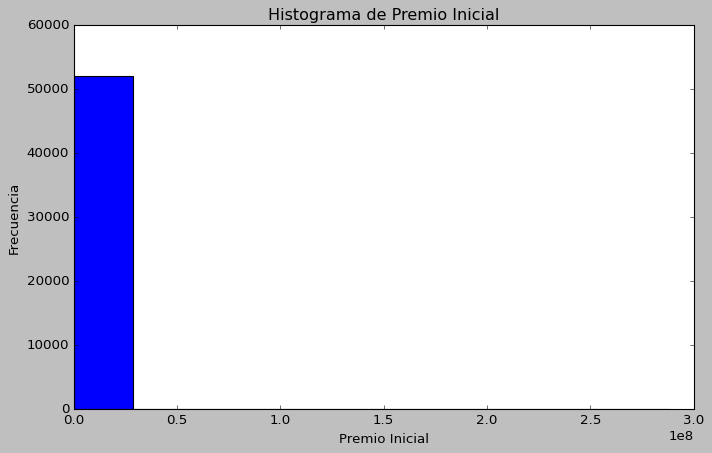

In [53]:
# Orientado a objetos
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= df.Premio_Inicial, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Premio Inicial')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Premio Inicial')

## Grafico 2: Piechart Participación por Tamaño de Empresa

In [54]:
tamaño_clientes= df[['Clientes','Riesgos','Premio_Inicial','Tamaño_Empresa']].groupby(by='Tamaño_Empresa').sum()
tamaño_clientes

,Clientes,Riesgos,Premio_Inicial
Tamaño_Empresa,,,
001-005,38883,76586,6.741060e+08
006-015,7772,70040,6.270876e+08
016-030,2388,51161,4.380803e+08
031-050,1086,42234,3.159927e+08
051-100,856,60623,4.528774e+08
101-200,519,72545,6.159511e+08
201-500,334,99995,9.996843e+08
501-999,194,256526,2.656973e+09


Text(0.5, 1.0, 'Distribución por tamaño de Empresa - Por Clientes')

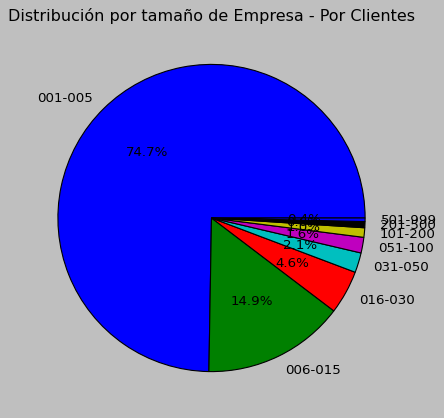

In [55]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(tamaño_clientes.Clientes, labels = tamaño_clientes.index,autopct='%1.1f%%')
ax.set_title('Distribución por tamaño de Empresa - Por Clientes')

Text(0.5, 1.0, 'Distribución por tamaño de Empresa - Por Riesgos')

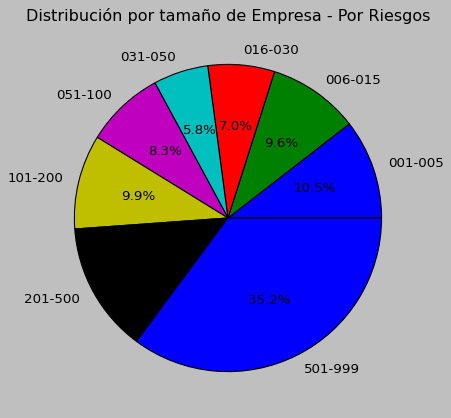

In [56]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(tamaño_clientes.Riesgos, labels = tamaño_clientes.index,autopct='%1.1f%%')
ax.set_title('Distribución por tamaño de Empresa - Por Riesgos')

In [57]:
aumentos=df.Rango_Aumentos_Enviados.value_counts()
aumentos

,count
Rango_Aumentos_Enviados,
0 - SIN AUMENTOS,34812
4 - HASTA 40%,10589
1 - HASTA 10%,3685
2 - HASTA 20%,1636
3 - HASTA 30%,1278
6 - MAS DE 50%,30
5 - HASTA 50%,2


Text(0.5, 0, 'Frecuencia de Rango de Aumentos')

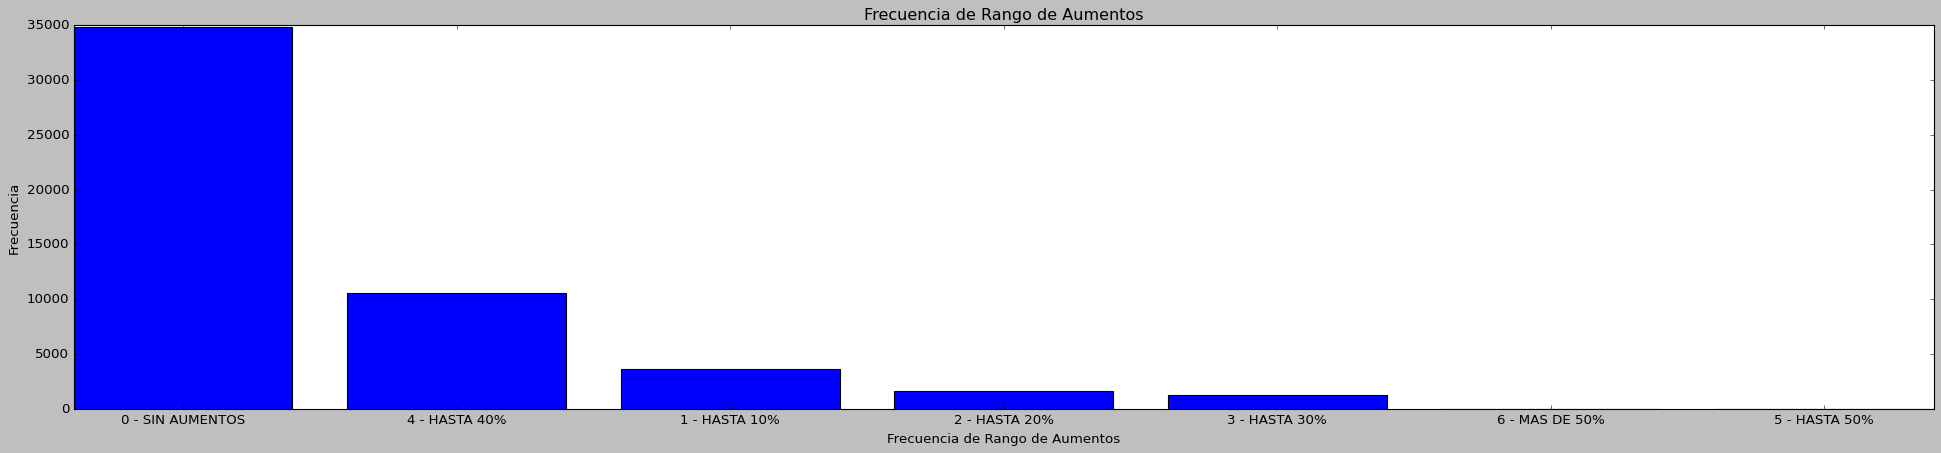

In [58]:
plt.figure(figsize=(30,6))
plt.bar(aumentos.index, aumentos)
plt.title('Frecuencia de Rango de Aumentos')
plt.ylabel('Frecuencia')
plt.xlabel('Frecuencia de Rango de Aumentos')

In [59]:
aumentos_clientes= df[['Clientes','Riesgos','Premio_Inicial','Rango_Aumentos_Enviados']].groupby(by='Rango_Aumentos_Enviados').sum()
aumentos_clientes

,Clientes,Riesgos,Premio_Inicial
Rango_Aumentos_Enviados,,,
0 - SIN AUMENTOS,34812,495520,4.456755e+09
1 - HASTA 10%,3685,29923,3.529671e+08
2 - HASTA 20%,1636,92309,1.196130e+09
3 - HASTA 30%,1278,61822,5.433803e+08
4 - HASTA 40%,10589,49663,2.281780e+08
5 - HASTA 50%,2,13,1.658058e+05
6 - MAS DE 50%,30,460,3.176272e+06


Text(0.5, 1.0, 'Distribución por tamaño de Empresa - Por Clientes')

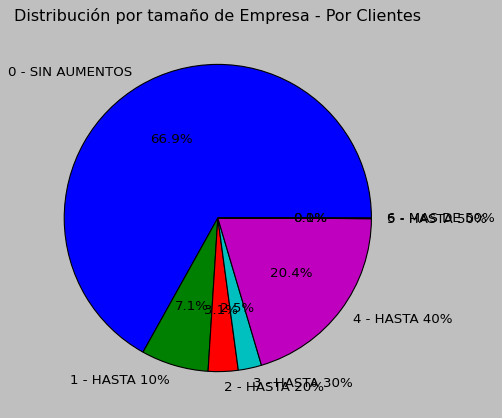

In [60]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(aumentos_clientes.Clientes, labels = aumentos_clientes.index,autopct='%1.1f%%')
ax.set_title('Distribución por tamaño de Empresa - Por Clientes')

Text(0.5, 1.0, 'Distribución por tamaño de Empresa - Por Riesgos')

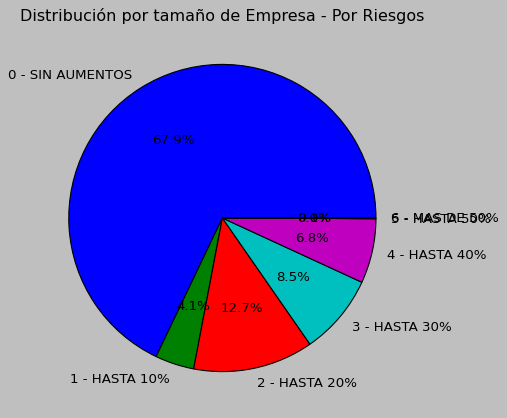

In [61]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(aumentos_clientes.Riesgos, labels = aumentos_clientes.index,autopct='%1.1f%%')
ax.set_title('Distribución por tamaño de Empresa - Por Riesgos')

# Seaborn

In [62]:
import seaborn as sns


In [63]:
df.shape

(52032, 24)

In [64]:
df.columns

Index(['Antiguedad', 'Actividad_2d', 'Tamaño_Empresa', 'Clientes', 'Riesgos',
       'Premio_Inicial', 'cod_pas', 'cod_org', 'Tipo_Intermediario', 'Region',
       'Sucursal', 'Resuscripcion?', 'Vigencia_Resuscripcion',
       'Premio_Enviado', 'Aumento_Enviado', 'Aum%', 'Rango_Aumentos_Enviados',
       'Baja?', 'Fecha_Baja', 'Motivo_Baja', 'Rango_Tecnico', 'Premio_Fin',
       'Aumento_Fin', 'Delta_Fin_$'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52032 entries, 0 to 52031
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Antiguedad               52032 non-null  int64         
 1   Actividad_2d             52032 non-null  int64         
 2   Tamaño_Empresa           52032 non-null  object        
 3   Clientes                 52032 non-null  int64         
 4   Riesgos                  52032 non-null  int64         
 5   Premio_Inicial           52032 non-null  float64       
 6   cod_pas                  52032 non-null  int64         
 7   cod_org                  52032 non-null  int64         
 8   Tipo_Intermediario       52032 non-null  object        
 9   Region                   52032 non-null  object        
 10  Sucursal                 52032 non-null  object        
 11  Resuscripcion?           52032 non-null  object        
 12  Vigencia_Resuscripcion   17152 n

In [66]:
print(df.Tamaño_Empresa.unique())
print(df.Region .unique())
print(df.Sucursal.unique())
print(df.Rango_Aumentos_Enviados.unique())
print(df. Rango_Tecnico.unique())

['001-005' '006-015' '016-030' '031-050' '101-200' '051-100' '501-999'
 '201-500']
['GranBA' 'Centro' 'NOA' 'PBA' 'Cuyo' 'NEA' 'Patagonia Sur'
 'Patagonia Norte']
['Capital Federal - PAS AMBA' 'Córdoba' 'San Miguel de Tucuman'
 'Mar del Plata' 'Capital Federal - Corporativo' 'San Juan' 'Posadas'
 'Salta' 'Río Gallegos' 'Rosario' 'Mendoza' 'Neuquén' 'Bahia Blanca'
 'Corrientes' 'La Plata' 'Tandil' 'Comodoro Rivadavia' 'San Luis' 'Trelew'
 'Río Cuarto' 'Capital Federal - Alianzas']
['0 - SIN AUMENTOS' '4 - HASTA 40%' '2 - HASTA 20%' '3 - HASTA 30%'
 '1 - HASTA 10%' '6 - MAS DE 50%' '5 - HASTA 50%']
[9 2 1 5 4 7 8 3 6 0]


In [67]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Antiguedad,52032.0,7.157211,0.0,2.0,5.0,11.0,27.0,6.796368
Actividad_2d,52032.0,68.172644,11.0,62.0,71.0,83.0,95.0,21.273918
Clientes,52032.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Riesgos,52032.0,14.024254,1.0,1.0,2.0,6.0,11319.0,118.965729
Premio_Inicial,52032.0,130318.888584,22.815,7163.049184,16003.149405,44585.391492,288262807.881129,1857094.602203
cod_pas,52032.0,8240.178083,16.0,2376.0,4247.5,20794.0,25977.0,8424.539319
cod_org,52032.0,7741.39691,16.0,2220.0,3772.0,6834.0,26978.0,8406.397247
Vigencia_Resuscripcion,17152,2023-10-29 16:23:32.126865664,2023-07-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2024-01-01 00:00:00,2024-05-01 00:00:00,NaN
Premio_Enviado,17220.0,164936.7147,31.995,5016.807769,11520.368808,34640.650009,167118429.445344,2156523.503729
Aumento_Enviado,17220.0,29977.501116,9.18,958.780125,2224.8466,6602.312514,25566835.490082,366360.987412


<Axes: xlabel='Riesgos', ylabel='Count'>

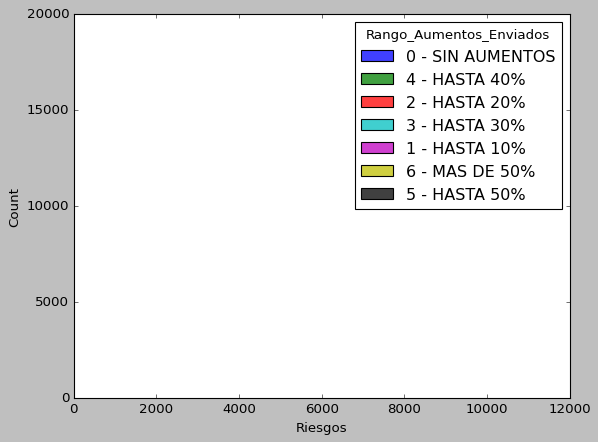

In [68]:
# Axes-level
sns.histplot(data=df, x="Riesgos", hue="Rango_Aumentos_Enviados", multiple='stack')

In [78]:
# Axis-level
ax = sns.boxplot(x=df["Aum%"])

KeyError: 'total_bill'

<Axes: xlabel='Aum%', ylabel='Count'>

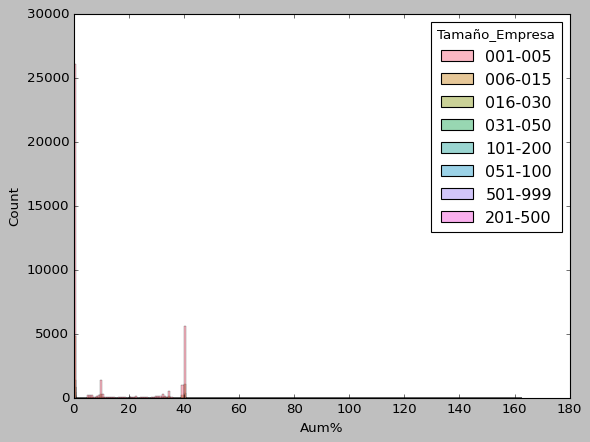

In [79]:
# Axis-level
sns.histplot(data=df, x="Aum%", hue="Tamaño_Empresa")

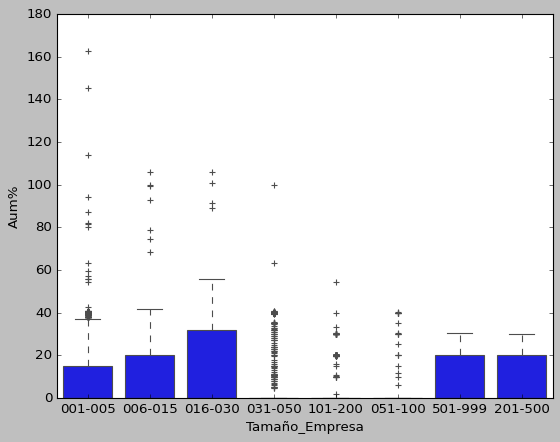

In [80]:
# Axis-level
ax = sns.boxplot (x='Tamaño_Empresa', y='Aum%', data=df)

In [81]:
import plotly.express as px
px.box(df, x='Aum%',y='Tamaño_Empresa')

<Axes: xlabel='Tamaño_Empresa', ylabel='Aum%'>

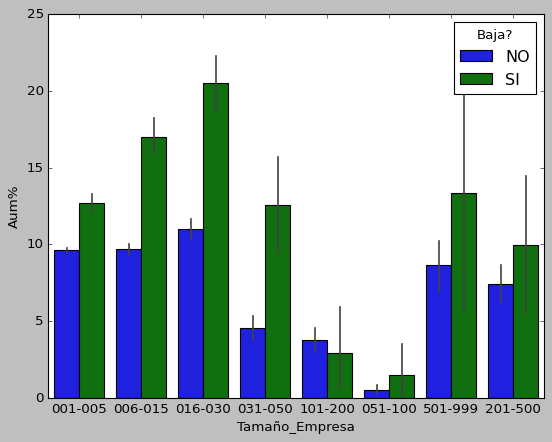

In [83]:
sns.barplot(x="Tamaño_Empresa", y="Aum%", hue="Baja?", data=df)